In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [16]:
# def draw_results(image_path, results):
#     # Load the image
#     img = cv2.imread(image_path)

#     spacer = 100
#     font = cv2.FONT_HERSHEY_SIMPLEX

#     for detection in results: 
#         top_left = tuple(map(int, detection[0][0]))
#         bottom_right = tuple(map(int, detection[0][2]))
#         text = detection[1]

#         # Draw rectangle around detected text
#         img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

#         # Calculate width and height of the text to be added
#         text_width, text_height = cv2.getTextSize(text, font, 0.5, 2)[0]

#         # Check if text width is smaller than the bounding box's width. If yes, add it inside.
#         if text_width < (bottom_right[0] - top_left[0]):
#             # Place text at the center of the bounding box
#             text_origin = (top_left[0], top_left[1] + int((bottom_right[1] - top_left[1] + text_height) / 2))
#             img = cv2.putText(img, text, text_origin, font, 0.5, (255, 0, 0), 2, cv2.LINE_AA)
#         else:
#             # If the text doesn't fit in its bounding box, then add it to the left side
#             img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
#             spacer += 15  # Only increase spacer if we added text to the left side
    
#     # Display the image
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB
#     plt.show()


In [30]:
def draw_results(image_path, results):
    # Load the image
    img = cv2.imread(image_path)

    font = cv2.FONT_HERSHEY_SIMPLEX

    for detection in results: 
        coordinates = detection[0]
        top_left = tuple(map(int, coordinates[0]))
        bottom_right = tuple(map(int, coordinates[2]))
        text = detection[1]
        confidence = detection[2]

        # Draw rectangle around detected text
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
        
        # Print the detected text, its confidence, and coordinates to the console
        print(f"Text: {text}")
        print(f"Coordinates: {coordinates}")
        print(f"Confidence: {confidence * 100:.2f}%")
        print("--------------")
    
    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB
    plt.show()


In [24]:
import os

# Get the current directory
current_directory = os.getcwd()

# List all files in the current directory
all_files = os.listdir(current_directory)

# Filter for image files
image_files = [file for file in all_files if file.endswith(('.jpg', '.png', '.jpeg', '.bmp', '.tiff'))]

# Print each image file name
for image_file in image_files:
    print(image_file)


butterflies.jpg
copy-text.png
images.jpg
xJida.png


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Text: TEXT
Coordinates: [[95, 54], [648, 54], [648, 252], [95, 252]]
Confidence: 99.92%
--------------


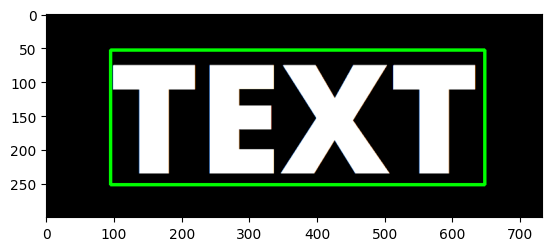

In [34]:
# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])

# Define the image path and read the text from the image
IMAGE_PATH = 'xJida.png'
result = reader.readtext(IMAGE_PATH)

# Display the results
draw_results(IMAGE_PATH, result)